In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyaudio
import wave
import time
import sys

from scripts.ioaudio import sigToWav

from scripts.graph import qp

c:\users\kilhe\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


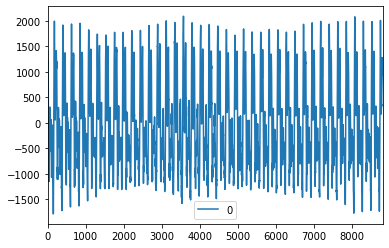

In [8]:
import pandas as pd
class Data:
    data=0
    ax=pd.DataFrame([0]).plot()
    updated=False

def callback(in_data, frame_count, time_info, status):
    buf=np.frombuffer(in_data, np.int16)
    plt.cla()
    if not Data.updated:
        Data.ax = qp(buf,ax=Data.ax)
        Data.updated=True
    else:
        qp(buf,ax=Data.ax)
    frames.append(in_data)
    return (in_data, pyaudio.paContinue)

FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 8820
WAVE_OUTPUT_FILENAME = "file.wav"

# instantiate PyAudio (1)
p = pyaudio.PyAudio()

# define callback (2)
#frame count just gives frames per buffer
#time info gives nothing interestingː
#{'input_buffer_adc_time': 0.0,
# 'current_time': 0.0,
# 'output_buffer_dac_time': 0.0}
#status gives 0
frames = []


# open stream using callback (3)
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK,
                stream_callback=callback)

# start the stream (4)
stream.start_stream()

# wait for stream to finish (5)
#while stream.is_active():
#    time.sleep(0.1)
time.sleep(3)
# stop stream (6)
stream.stop_stream()
stream.close()

# close PyAudio (7)
p.terminate()

sigToWav(frames,stream,"voice.wav")